In [37]:
import sys
assert sys.version_info >= (3, 8)

import sklearn
assert sklearn.__version__ >= "0.23"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = '.'

Get the data

In [38]:
import gzip
import urllib
import shutil

DOWNLOAD_ROOT = 'https://storage.googleapis.com/properati-data-public/pe_properties.csv.gz'
DATASET_FOLDER = 'dataset'
FILE = 'properati.csv.gz'
PATH = os.path.join(DATASET_FOLDER, FILE)


def download_data(dataset_url = DOWNLOAD_ROOT, path=PATH, dirs=DATASET_FOLDER):
    if not os.path.isdir(dirs):
        os.makedirs(dirs)
    urllib.request.urlretrieve(dataset_url, path)
    print(f'Data downloaded on {path}')

In [39]:
download_data()

Data downloaded on dataset/properati.csv.gz


Load Data

In [40]:
import pandas as pd

def load_data(path=PATH):
    return pd.read_csv(path, compression='gzip')

In [41]:
properati = load_data()
properati

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,jGGhCWH7cBWuUAmw566hRw==,Propiedad,2019-09-10,2019-09-19,2019-09-10,-12.194754,-77.014153,Perú,Lima,Lima,...,NaN,NaN,NaN,12962052.0,USD,NaN,"Venta Terreno en Chorrillos, Cerca Megaplaza E...","Terreno en Venta en Chorrillos, Cerca a Megapl...",Lote,Venta
1,6FBYqaoLJUPDkyXe+ikFdg==,Propiedad,2019-09-10,2019-10-11,2019-09-10,-12.097327,-77.060898,Perú,Lima,Lima,...,2.0,NaN,NaN,230000.0,USD,NaN,Proyecto Sky - Magdalena,Venta de Departamentos ubicados en Calle Baca ...,Departamento,Venta
2,l+pGScyek2VFHlJqmtRP/A==,Propiedad,2019-09-10,2019-09-20,2019-09-10,-12.121200,-77.040648,Perú,Lima,Lima,...,NaN,152.0,152.0,2100.0,USD,Mensual,Departamentos alquiler,Lindo departamento de estreno con vista al mar...,Departamento,Alquiler
3,QHS31bGc+VnYZKpXv2efgw==,Propiedad,2019-09-10,2019-09-20,2019-09-10,-12.138606,-77.025110,Perú,Lima,Lima,...,NaN,90.0,90.0,1200.0,USD,Mensual,Departamentos alquiler,Lindo departamento tipo loft en calle Las Mimo...,Departamento,Alquiler
4,LPmONbSVtdT5XtBUlndLWg==,Propiedad,2019-09-10,2020-02-28,2019-09-10,-12.046373,-77.042754,Perú,Lima,Lima,...,NaN,75.0,75.0,75000.0,USD,Mensual,Departamentos venta,VENTA DE DEPARTAMENTO + ESTACIONAMIENTO + AIRE...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105078,CZJBJ1HJQ8UJGEW094TpEg==,Propiedad,2019-07-19,2019-10-28,2019-07-19,-12.075601,-76.930602,Perú,Lima,Lima,...,NaN,1282.0,490.0,4500.0,USD,Mensual,Casa alquiler,Hermosa Casa en Rinconada Alta\r\n\r\nHERMOSA ...,Casa,Alquiler
105079,1fnehtJVzapabMmVuvigMg==,Propiedad,2019-07-19,2019-11-13,2019-07-19,-12.067728,-77.074207,Perú,Lima,Lima,...,3.0,192.0,192.0,3500.0,USD,Mensual,SUPER LOCAL COMERCIAL EN Av. MARIANO H. CORNEJO!!,Local comercial de 192m2 con casi 8 metros lin...,Local comercial,Alquiler
105080,EATyn/vn2V0q18OIvUIIFQ==,Propiedad,2019-07-19,2019-10-29,2019-07-19,-12.095559,-77.060787,Perú,Lima,Lima,...,4.0,286.0,206.0,2100.0,USD,Mensual,CASA EN MAGDALENA!! A MEDIA CUADRA DE JAVIER...,CASA EN MAGDALENA!! A MEDIA CUADRA DE JAVIER P...,Casa,Alquiler
105081,AdsfP8yVQAacNv3fuVrktw==,Propiedad,2019-07-19,2019-10-12,2019-07-19,-8.106043,-79.032973,Perú,La Libertad,Trujillo,...,NaN,1586.0,913.0,8000.0,USD,Mensual,ALQUILO LOCAL PARA EMPRESAS,ALQUILO LOCAL PARA EMPRESAS CON 15 OFICINAS UB...,Lote,Alquiler


In [42]:
properati.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 105083 entries, 0 to 105082
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               105083 non-null  object 
 1   ad_type          105083 non-null  object 
 2   start_date       105083 non-null  object 
 3   end_date         105083 non-null  object 
 4   created_on       105083 non-null  object 
 5   lat              99688 non-null   float64
 6   lon              99688 non-null   float64
 7   l1               105083 non-null  object 
 8   l2               105083 non-null  object 
 9   l3               100034 non-null  object 
 10  l4               82199 non-null   object 
 11  l5               67 non-null      object 
 12  l6               0 non-null       float64
 13  rooms            18843 non-null   float64
 14  bedrooms         36275 non-null   float64
 15  bathrooms        73514 non-null   float64
 16  surface_total    53586 n

In [43]:
properati['property_type'].value_counts()

Departamento       44061
Otro               21311
Casa               17164
Lote               11699
Local comercial     6146
Oficina             4165
Depósito             490
PH                    29
Casa de campo         10
Cochera                8
Name: property_type, dtype: int64

In [44]:
properati['l2'].value_counts()

Lima             76864
Arequipa         11387
La Libertad       4079
Piura             2800
Lambayeque        2186
Ica               1347
Cusco             1166
Cajamarca         1098
Callao             917
Tacna              753
San Martin         423
Huánuco            288
Amazonas           277
Ancash             249
Junín              246
Moquegua           218
Tumbes             175
Loreto             168
Puno               153
Ucayali             86
Pasco               78
Madre de Dios       55
Apurimac            41
Ayacucho            28
Huancavelica         1
Name: l2, dtype: int64

In [45]:
properati.describe()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,99688.000000,99688.000000,0.0,18843.000000,36275.000000,73514.000000,53586.000000,3.877200e+04,1.032920e+05
mean,-12.066526,-76.512216,NaN,3.438943,2.980868,2.733915,639.186952,1.945231e+04,3.203803e+05
std,2.428058,2.156849,NaN,2.550545,2.330809,1.733570,8885.282621,3.494579e+06,1.334729e+06
min,-18.341223,-81.276001,NaN,1.000000,0.000000,1.000000,10.000000,1.000000e+00,0.000000e+00
25%,-12.149471,-77.058998,NaN,2.000000,2.000000,2.000000,81.000000,8.000000e+01,4.500000e+03
50%,-12.096724,-77.013000,NaN,3.000000,3.000000,2.000000,122.000000,1.240000e+02,1.100000e+05
75%,-12.033301,-76.928234,NaN,4.000000,4.000000,3.000000,224.000000,2.200000e+02,2.749200e+05
max,-3.482000,-69.101447,NaN,20.000000,36.000000,20.000000,500000.000000,6.879756e+08,1.111111e+08


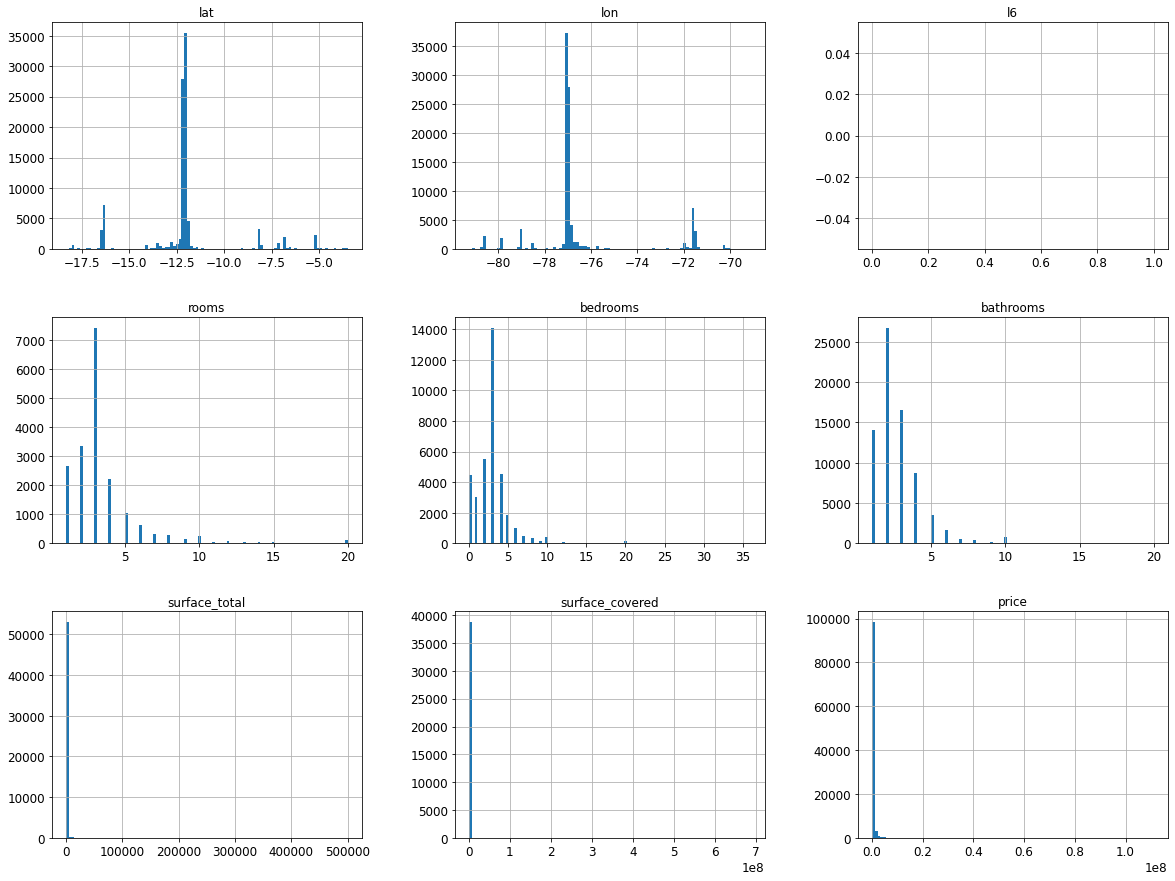

In [46]:
properati.hist(bins=100, figsize=(20,15))
plt.show()


Split Train Test

In [47]:
np.random.seed(42)

In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(properati, test_size=0.2, random_state=42)

In [49]:
train_set

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
102325,Hl/gZTHU0zjim1Db712ojw==,Propiedad,2019-08-10,2019-08-23,2019-08-10,-12.082000,-77.046997,Perú,Lima,Lima,...,2.0,112.0,NaN,640917.0,PEN,NaN,IC - 27 / VENTA DE DEPARTAMENTO EN JESÚS MARÍA...,VENTA DE DEPARTAMENTO - ESTRENO EN JESÚS MARÍA...,Departamento,Venta
100140,fawM6+suX+kex1ViYS/DeA==,Propiedad,2020-07-18,2020-09-26,2020-07-18,-13.524092,-71.964936,Perú,Cusco,Cusco,...,NaN,NaN,478.0,1362300.0,USD,Mensual,SE VENDE CASA COMO TERRENO COMERCIAL CON UN ÁR...,Se vende casa como terreno con un área de 478m...,Lote,Venta
100598,v38CDxnIilw2NYebXXWkyA==,Propiedad,2019-08-10,2019-09-14,2019-08-10,-11.997066,-77.083237,Perú,Lima,Lima,...,2.0,73.0,76.0,70000.0,USD,Mensual,VENDO LINDO DUPLEX EN 5 PISO<br>MODERNO Y MUY ...,AO: 76.35 M2 AT: 72.62 m2 QUINTO PISO: 35.31 M...,Departamento,Venta
7306,553F9Fs1BEkvIUo6S7rxwg==,Propiedad,2020-03-31,9999-12-31,2020-03-31,-12.131927,-77.026907,Perú,Lima,Lima,...,4.0,159.0,159.0,528573.0,USD,Mensual,VENTA DE DEPARTAMENTO EN MIRAFLORES - PROYECTO...,SAN FERNANDO La comodidad del éxito! Llega un ...,Departamento,Venta
48391,xihGN9hKAO3tYBio54+5Vw==,Propiedad,2020-01-20,2020-01-30,2020-01-20,-8.105761,-79.043590,Perú,La Libertad,Trujillo,...,3.0,NaN,NaN,48000.0,USD,NaN,DEPARTAMENTOS EN RESIDENCIAL LIVERPOOL,"Residencial Liverpool, a 4 cuadras del CC. Mal...",Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,Lx5Z1GTCic8bZwORKqTZqw==,Propiedad,2020-02-21,2020-07-02,2020-02-21,-12.075106,-77.065729,Perú,Lima,Lima,...,3.0,NaN,NaN,229567.0,PEN,NaN,Moderno Departamento Flat de Estreno en Mirafl...,"Moderno y amplio departamento Flat de estreno,...",Departamento,Venta
76820,FRu6OB7GM4D8/5reJCp2aQ==,Propiedad,2019-10-07,2019-10-19,2019-10-07,-12.112042,-76.940506,Perú,Lima,Lima,...,2.0,63.0,NaN,95000.0,USD,NaN,REMAX VENDE DPTO 100% REMODELADO CDRA 30 AV E...,REMAX VENDE DPTO EN CONDOMINIO RESIDENCIAL EL ...,Departamento,Venta
103694,d5zdFzl9MTJXgDAUfvBFyA==,Propiedad,2020-07-27,2020-07-27,2020-07-27,-13.473000,-76.186996,Perú,Ica,Chincha,...,NaN,NaN,NaN,220000.0,USD,Mensual,Venta- 2.20 has de terreno rural FRENTE A LA ...,"venta de terreno de 22,000 m2 playa las viole...",Lote,Venta
860,mnsnWUPUDkOXCZGGC4/a5g==,Propiedad,2019-11-04,2019-12-19,2019-11-04,-12.303000,-76.782997,Perú,Lima,Lima,...,4.0,NaN,NaN,240000.0,USD,NaN,VENTA DE CASA EN PUNTA HERMOSA!!,"Acogedora casa en venta, ubicada en Punta Herm...",Casa,Venta


&lt;AxesSubplot:&gt;

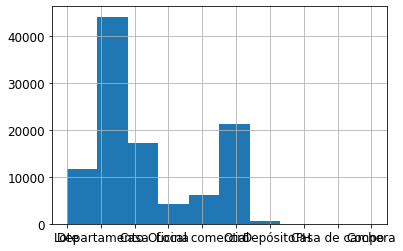

In [73]:
properati['property_type'].hist()

In [79]:
properati['property_type'].value_counts() / len(properati)

Departamento       0.419297
Otro               0.202802
Casa               0.163338
Lote               0.111331
Local comercial    0.058487
Oficina            0.039635
Depósito           0.004663
PH                 0.000276
Casa de campo      0.000095
Cochera            0.000076
Name: property_type, dtype: float64

In [75]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(properati, properati['property_type']):
    strat_train_set = properati.loc[train_index]
    strat_test_set = properati.loc[test_index]

In [76]:
strat_test_set['property_type'].value_counts() / len(properati)

Departamento       0.083858
Otro               0.040558
Casa               0.032669
Lote               0.022268
Local comercial    0.011696
Oficina            0.007927
Depósito           0.000933
PH                 0.000057
Cochera            0.000019
Casa de campo      0.000019
Name: property_type, dtype: float64

In [77]:
strat_train_set['property_type'].value_counts() / len(properati)

Departamento       0.335440
Otro               0.162243
Casa               0.130668
Lote               0.089063
Local comercial    0.046792
Oficina            0.031708
Depósito           0.003730
PH                 0.000219
Casa de campo      0.000076
Cochera            0.000057
Name: property_type, dtype: float64

In [84]:
def property_type_proportions(data):
    return data['property_type'].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": property_type_proportions(properati),
    "Stratified": property_type_proportions(strat_test_set),
    "Random": property_type_proportions(test_set)
}).sort_index()

compare_props["Rand. perc. error"] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props["Strat. perc. error"] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [85]:
compare_props

,Overall,Stratified,Random,Rand. perc. error,Strat. perc. error
Casa,0.163338,0.163344,0.161631,-1.044764,0.003923
Casa de campo,0.000095,0.000095,0.000048,-50.000952,-0.001903
Cochera,0.000076,0.000095,0.000095,24.997621,24.997621
Departamento,0.419297,0.419280,0.418138,-0.276517,-0.004173
Depósito,0.004663,0.004663,0.004948,6.120429,-0.001903
Local comercial,0.058487,0.058476,0.059571,1.852926,-0.018174
Lote,0.111331,0.111338,0.110482,-0.762638,0.006644
Oficina,0.039635,0.039635,0.039825,0.478280,-0.001903
Otro,0.202802,0.202788,0.204929,1.049177,-0.006596
PH,0.000276,0.000285,0.000333,20.687358,3.446307


Concluding doing this comparison, we can see that when we use random sampling we have huge percentage of error for that ones that have low categorical values like Casa de Campo, Cochera. Doing Stratified sampling is better in this case but is not really important to try to predict these kind of properties, we can eliminate this records to not bias our sample.